In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
from inverse_problem_predict import *

In [2]:
def getd(de_c5):
    de_c5['d_bu'] = pd.DataFrame.abs(de_c5['st'] -  de_c5['st0'])
    de_c5['d_st'] = pd.DataFrame.abs(de_c5['pw'] -  de_c5['pw0'])
    de_c5['d_pw'] = pd.DataFrame.abs(de_c5['bu'] -  de_c5['bu0'])
    de_c5['d_tin'] = pd.DataFrame.abs(de_c5['tin'] -  de_c5['tin0'])

## clean, 5 Case, DE vs LHS

In [4]:
mu_initials = np.array([[20, 100, 61.11, 291.76],
                        [210, 600, 71.51, 293.54],
                        [400, 1000, 18.00, 293.54],
                        [500, 1000, 35.00, 297.54],
                        [120, 1700, 52.15, 300.00],
                        [130, 1480, 52.15, 300.00]])

mus_indx = [0, 9841, 12288, 12589, 13326]

In [15]:
case5 = joblib.load('result/clean5caseDE1_0606.pkl')

In [16]:
case5.keys()

dict_keys(['sigmas', 'num', 'noise', 'record', 'de_results', 'de_iteration', 'cases'])

In [43]:
de_c5 = case5['de_results']
getd(de_c5)

In [44]:
de_c5[[ 'd_bu','d_st','d_pw', 'd_tin','bu','st','pw', 'tin','bu0','st0','pw0', 'tin0']]

d_bu      d_st      d_pw     d_tin         bu           st  \
sigma id                                                                        
0     0       14.482235  5.285947  1.958778  0.136534  59.149622    14.482235   
      9841   105.664668  2.083778  7.664239  1.521675  65.848961   394.335332   
      12288  215.293482  1.087741  1.847456  1.460577  29.879656   784.706518   
      12589  231.004774  0.023664  0.761316  4.373310  52.197684   768.995226   
      13326   62.861198  0.384148  4.078952  0.262615  48.067048  1437.138802   
...                 ...       ...       ...       ...        ...          ...   
49    0        8.978360  7.110557  3.266870  1.651870  57.841530     8.978360   
      9841   105.203666  1.738377  6.964643  0.735214  66.548557   394.796334   
      12288  103.770365  1.835168  1.070148  1.461915  29.102348  1103.770365   
      12589   80.320642  1.354404  3.441435  3.938491  49.517565  1080.320642   
      13326   90.329338  0.155492  4.143003  0.580750  48.002997  1590.329338   

                     pw         tin      bu0     st0    pw0     tin0  
sigma id                                                              
0     0        5.285947  291.620466  61.1084     0.0    0.0  291.757  
      9841   202.083778  292.061675  73.5132   500.0  200.0  290.540  
      12288  401.087741  297.274423  28.0322  1000.0  400.0  298.735  
      12589  499.976336  295.883310  52.9590  1000.0  500.0  291.510  
      13326  130.384148  291.274615  52.1460  1500.0  130.0  291.012  
...                 ...         ...      ...     ...    ...      ...  
49    0        7.110557  293.408870  61.1084     0.0    0.0  291.757  
      9841   201.738377  291.275214  73.5132   500.0  200.0  290.540  
      12288  398.164832  297.273085  28.0322  1000.0  400.0  298.735  
      12589  501.354404  295.448491  52.9590  1000.0  500.0  291.510  
      13326  129.844508  290.431250  52.1460  1500.0  130.0  291.012  

[250 rows x 12 columns]

In [102]:
m5c = de_c5[['field_error', 'linf_error','f_field_error','f_linf_error', 'd_bu','d_st','d_pw', 'd_tin','de_time']].groupby(level=1).mean()
m5c

,field_error,linf_error,f_field_error,f_linf_error,d_bu,d_st,d_pw,d_tin,de_time
id,,,,,,,,,
0,0.007310,0.043608,0.007253,0.042200,13.396182,6.478533,3.107527,1.960320,1.331903
9841,0.009627,0.053930,0.012709,0.055815,113.101748,1.371793,6.106870,0.675251,1.291366
12288,0.008335,0.061166,0.008309,0.061247,148.953806,1.301687,1.381626,1.595937,1.401890
12589,0.006951,0.040831,0.006773,0.040493,105.929290,0.628045,1.312759,1.317048,1.285382
13326,0.007512,0.055478,0.011027,0.070813,105.629302,0.696966,3.784188,0.981440,1.271270


In [334]:
m5c.style.to_latex('result/m5c.tex')

In [46]:
s5c = de_c5[['field_error', 'linf_error','f_field_error','f_linf_error','d_bu','d_st','d_pw', 'd_tin','de_time']].groupby(level=1).std()
s5c

,field_error,linf_error,f_field_error,f_linf_error,d_bu,d_st,d_pw,d_tin,de_time
id,,,,,,,,,
0,0.002235,0.005550,0.0,0.0,8.331204,4.871242,2.623711,1.914346,0.451065
9841,0.001792,0.013257,0.0,0.0,57.691329,1.130047,1.589305,0.818778,0.136512
12288,0.000185,0.000570,0.0,0.0,65.010241,0.893008,0.926508,1.127800,0.904520
12589,0.000386,0.000874,0.0,0.0,71.281019,0.523044,0.805683,1.468089,0.109569
13326,0.000436,0.008584,0.0,0.0,73.490624,0.696868,1.206501,1.070180,0.077205


In [335]:
s5c.style.to_latex('result/s5c.tex')

In [8]:
case5i = joblib.load('result/clean5caseDEInitial_0620.pkl')

In [11]:
de_c5i = case5i['de_results']
getd(de_c5i)
de_c5i

field_error  observation_error  linf_error  f_field_error  \
id    run                                                              
0     1       0.005407           0.003752    0.042146       0.007253   
      2       0.005407           0.003752    0.042146       0.007253   
      3       0.005192           0.003352    0.043175       0.007253   
      4       0.005192           0.003352    0.043175       0.007253   
      5       0.005407           0.003752    0.042146       0.007253   
...                ...                ...         ...            ...   
13326 45      0.007220           0.005315    0.049111       0.011027   
      46      0.007220           0.005315    0.049111       0.011027   
      47      0.007220           0.005315    0.049111       0.011027   
      48      0.007220           0.005315    0.049111       0.011027   
      49      0.007220           0.005315    0.049111       0.011027   

           f_observation_error  f_linf_error   nfev   nit   de_time  \
id    run                                                             
0     1               0.005687      0.042200  960.0  15.0  1.507966   
      2               0.005687      0.042200  960.0  15.0  1.474065   
      3               0.005687      0.042200  960.0  15.0  1.431173   
      4               0.005687      0.042200  960.0  15.0  1.416213   
      5               0.005687      0.042200  960.0  15.0  1.425189   
...                        ...           ...    ...   ...       ...   
13326 45              0.008834      0.070813  960.0  15.0  1.126985   
      46              0.008834      0.070813  960.0  15.0  1.124993   
      47              0.008834      0.070813  960.0  15.0  1.109028   
      48              0.008834      0.070813  960.0  15.0  1.137957   
      49              0.008834      0.070813  960.0  15.0  1.144939   

                    st  ...          pw         tin     st0      bu0    pw0  \
id    run               ...                                                   
0     1      17.644740  ...    5.802257  292.961189     0.0  61.1084    0.0   
      2      11.238970  ...    5.607988  288.645001     0.0  61.1084    0.0   
      3       3.574994  ...    9.124505  285.065153     0.0  61.1084    0.0   
      4      18.827421  ...    9.062428  284.951555     0.0  61.1084    0.0   
      5      10.903634  ...    4.569684  292.207627     0.0  61.1084    0.0   
...                ...  ...         ...         ...     ...      ...    ...   
13326 45   1721.609696  ...  129.715148  290.297035  1500.0  52.1460  130.0   
      46   1701.628693  ...  129.962289  291.573220  1500.0  52.1460  130.0   
      47   1729.177705  ...  129.807556  290.569441  1500.0  52.1460  130.0   
      48   1699.270351  ...  129.669681  291.335766  1500.0  52.1460  130.0   
      49   1688.343558  ...  130.557920  290.693761  1500.0  52.1460  130.0   

              tin0        d_bu      d_st      d_pw     d_tin  
id    run                                                     
0     1    291.757   17.644740  5.802257  1.132133  1.204189  
      2    291.757   11.238970  5.607988  2.310435  3.111999  
      3    291.757    3.574994  9.124505  3.695817  6.691847  
      4    291.757   18.827421  9.062428  3.653164  6.805445  
      5    291.757   10.903634  4.569684  1.460955  0.450627  
...            ...         ...       ...       ...       ...  
13326 45   291.012  221.609696  0.284852  3.455940  0.714965  
      46   291.012  201.628693  0.037711  4.284834  0.561220  
      47   291.012  229.177705  0.192444  3.699727  0.442559  
      48   291.012  199.270351  0.330319  3.946960  0.323766  
      49   291.012  188.343558  0.557920  3.955444  0.318239  

[245 rows x 21 columns]

In [12]:
m5ci = de_c5i[['field_error', 'linf_error','f_field_error','f_linf_error', 'd_bu','d_st','d_pw', 'd_tin','de_time']].groupby(level=0).mean()
m5ci

,field_error,linf_error,f_field_error,f_linf_error,d_bu,d_st,d_pw,d_tin,de_time
id,,,,,,,,,
0,0.005332,0.042473,0.007253,0.042200,11.476081,5.949401,2.655664,4.632308,1.419468
9841,0.007393,0.046730,0.012709,0.055815,92.664340,2.183830,4.662955,4.382130,1.163788
12288,0.008309,0.061247,0.008309,0.061247,50.824967,1.512548,1.687512,1.528885,1.164763
12589,0.006773,0.040493,0.006773,0.040493,38.450101,0.452740,1.372938,1.501878,1.158868
13326,0.007245,0.049690,0.011027,0.070813,189.046856,0.266516,3.980747,0.590805,1.143382


In [16]:
s5ci = de_c5i[['field_error', 'linf_error','f_field_error','f_linf_error','d_bu','d_st','d_pw', 'd_tin','de_time']].groupby(level=0).std()
s5ci

,field_error,linf_error,f_field_error,f_linf_error,d_bu,d_st,d_pw,d_tin,de_time
id,,,,,,,,,
0,1.004641e-04,4.618244e-04,0.0,0.0,6.792108,2.718364,1.122647,2.597929,0.035093
9841,0.000000e+00,0.000000e+00,0.0,0.0,56.506018,0.605903,0.304568,1.484933,0.017660
12288,2.553444e-18,4.911647e-17,0.0,0.0,27.059194,1.050485,1.132107,0.999382,0.037815
12589,9.936877e-19,0.000000e+00,0.0,0.0,26.944668,0.597656,0.458052,1.100222,0.026806
13326,1.743043e-04,4.050592e-03,0.0,0.0,42.178641,0.176509,0.526895,0.350466,0.020705


## Normal Noise 0-0.2, DE vs LHS

In [24]:
d1 = joblib.load('result/513de_result.pkl')
d2 = joblib.load('result/5131de_result.pkl')
d = pd.concat((d1, d2))

In [47]:
getd(d)

In [48]:
d[[ 'd_bu','d_st','d_pw', 'd_tin','bu','st','pw', 'tin','bu0','st0','pw0', 'tin0']]

d_bu       d_st       d_pw     d_tin         bu          st  \
sigma id                                                                       
0     7270  13.844107   1.231717   3.321555  0.525939  63.040755  163.844107   
      860    3.080870   0.249534   5.164129  1.040716  72.869229    3.080870   
      5390   0.951727   2.052318   5.451557  0.098257  36.328243   99.048273   
      5191  14.033982   0.714692   1.960528  2.451433  49.494572  114.033982   
      5734  25.831978   3.296491   3.880688  7.653378  75.584612  124.168022   
...               ...        ...        ...       ...        ...         ...   
20    6736  62.396634   7.462825   6.825365  1.601659  86.341135   87.603366   
      391    2.129693  15.889142  13.538033  3.542747  38.366267    2.129693   
      5892  12.101859  23.070949   0.941015  2.765652  31.800415  137.898141   
      3561  28.354429   2.072855   7.686681  1.510499  47.843119   21.645571   
      6184  19.767876  13.580270  18.675064  2.362520  34.911336  169.767876   

                    pw         tin      bu0    st0    pw0     tin0  
sigma id                                                            
0     7270  576.231717  292.654061  59.7192  150.0  575.0  293.180  
      860   285.750466  298.776284  67.7051    0.0  286.0  299.817  
      5390  561.947682  290.881257  41.7798  100.0  564.0  290.783  
      5191  498.714692  296.931433  51.4551  100.0  498.0  294.480  
      5734   59.703509  298.748378  79.4653  150.0   63.0  291.095  
...                ...         ...      ...    ...    ...      ...  
20    6736  404.462825  293.164659  93.1665  150.0  397.0  291.563  
      391   114.110858  292.747253  51.9043    0.0  130.0  296.290  
      5892  139.070949  294.393652  30.8594  150.0  116.0  291.628  
      3561  573.072855  296.346499  55.5298   50.0  571.0  294.836  
      6184  226.580270  290.382480  53.5864  150.0  213.0  292.745  

[2100 rows x 12 columns]

In [63]:
pn0 = d[['bu0', 'st0', 'pw0', 'tin0']].rename(columns={'bu0':'bu', 'st0':'st', 'pw0':'pw', 'tin0':'tin'}) 
diffn = (d[['bu', 'st', 'pw', 'tin']] -  pn0)
diffn = diffn.rename(columns={ 'bu':'Pw','st':'Bu', 'pw':'St', 'tin':'Tin'}).reindex(columns=['Bu','St','Pw','Tin'])

f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

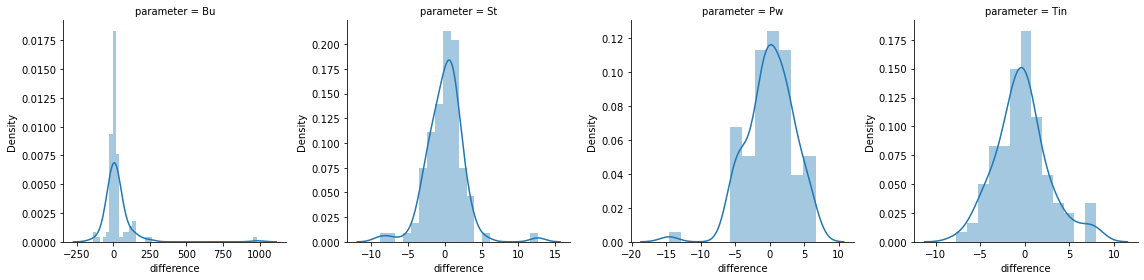

In [65]:
g = sns.FacetGrid(diffn.loc[0].melt(var_name='parameter', value_name='difference'), 
                  col="parameter", sharex=False, sharey=False,
                 col_wrap=4, height=4)
g.map(sns.distplot, "difference")

f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

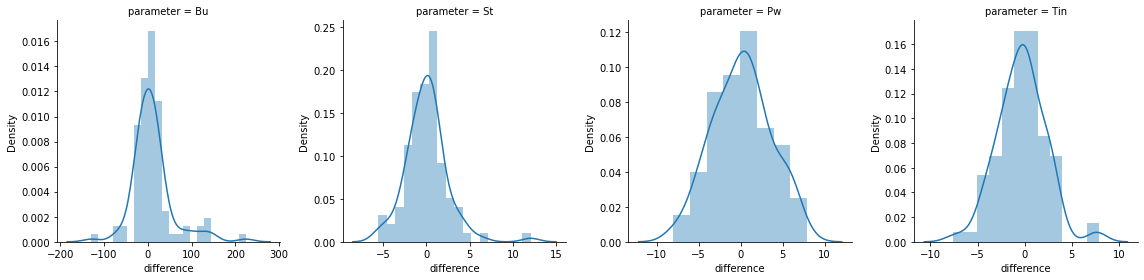

In [337]:
g = sns.FacetGrid(diffn.loc[1].melt(var_name='parameter', value_name='difference'), 
                  col="parameter", sharex=False, sharey=False,
                 col_wrap=4, height=4)
g.map(sns.distplot, "difference")

f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

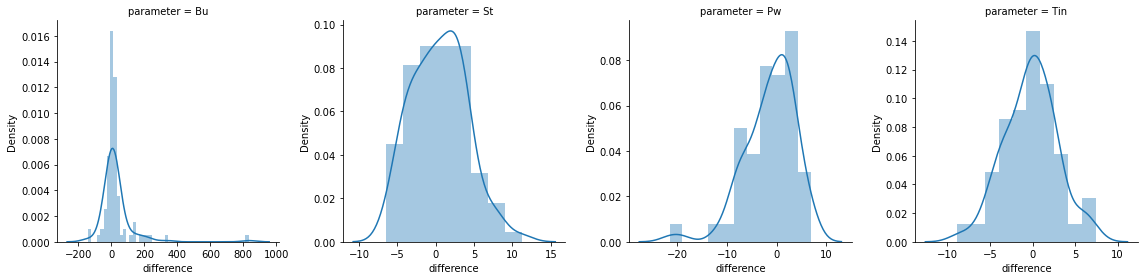

In [66]:
g = sns.FacetGrid(diffn.loc[5].melt(var_name='parameter', value_name='difference'), 
                  col="parameter", sharex=False, sharey=False,
                 col_wrap=4, height=4)
g.map(sns.distplot, "difference")

f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

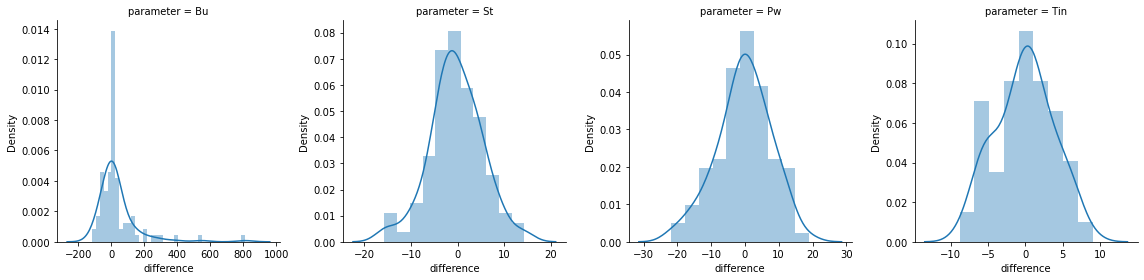

In [336]:
g = sns.FacetGrid(diffn.loc[10].melt(var_name='parameter', value_name='difference'), 
                  col="parameter", sharex=False, sharey=False,
                 col_wrap=4, height=4)
g.map(sns.distplot, "difference")

In [80]:
pd.set_option('display.max_rows', 100)

In [89]:
diffn['Bu'][diffn['Bu']>500].unstack().count().sort_values()

id
9687     1
8792     1
7734     1
3073     1
7041     1
6265     1
7849     1
2027     1
9692     1
7629     1
4859     1
189      1
7270     1
8666     1
5463     1
8529     1
3561     1
8571     1
5311     1
7916     1
6863     2
7892     2
7208     2
5276     2
5393     2
9670     2
3152     2
5486     2
7099     2
8684     4
8838     6
5051     7
3556    10
dtype: int64

In [93]:
diffn['St'][diffn['St']>50].unstack().count().sort_values()

id
5734    1
189     1
64      1
1899    1
466     1
dtype: int64

In [96]:
d.loc[0,3556]

field_error             0.055720
observation_error       0.045064
linf_error              0.223617
nfev                 1745.000000
nit                    28.000000
de_message              0.000000
pw                    560.102835
st                   1030.478993
bu                     99.182984
tin                   293.475973
pw0                   569.000000
st0                    50.000000
bu0                    96.096200
tin0                  299.188000
d_bu                  980.478993
d_st                    8.897165
d_pw                    3.086784
d_tin                   5.712027
Name: (0, 3556), dtype: float64

In [101]:
error = d[['field_error', 'linf_error','d_bu','d_st','d_pw','d_tin']].groupby(level =0).mean()
error

,field_error,linf_error,d_bu,d_st,d_pw,d_tin
sigma,,,,,,
0,0.007990,0.053887,45.330600,1.767766,2.624314,2.244898
1,0.007884,0.052853,29.547668,1.701338,2.776708,1.953233
2,0.008364,0.054622,38.737919,2.111478,3.114222,2.330001
3,0.008960,0.057035,32.171252,2.050099,3.190535,2.471787
4,0.010657,0.062378,48.869328,2.403855,4.185277,2.733460
5,0.011718,0.068158,45.994717,2.959582,3.917525,2.398611
6,0.013069,0.069513,64.104477,3.044197,5.212571,2.519369
7,0.012805,0.072060,49.181643,3.218703,4.831976,2.972528
8,0.014559,0.075256,43.096032,3.708119,4.955029,2.496311


In [338]:
error.style.to_latex('result\error.tex')

## Uniform Noise

In [18]:
ud1 = joblib.load('result/513unif1de_result.pkl')
ud2 = joblib.load('result/513unif2de_result.pkl')
ud = pd.concat((ud1, ud2))

In [20]:
getd(ud)

In [22]:
uerror = ud[['field_error', 'linf_error','d_bu','d_st','d_pw','d_tin']].groupby(level =0).mean()
uerror

,field_error,linf_error,d_bu,d_st,d_pw,d_tin
sigma,,,,,,
0,0.007990,0.053887,45.330600,1.767766,2.624314,2.244898
1,0.007991,0.052823,25.650712,1.769403,3.159493,1.966939
2,0.008325,0.054118,37.270046,1.842590,2.915896,2.077944
3,0.009694,0.059397,49.975999,2.132845,3.762460,2.494058
4,0.009871,0.058390,39.238605,2.187276,3.787754,2.593625
5,0.012045,0.065548,71.591308,2.563751,3.734554,3.080071
6,0.013091,0.066164,60.844542,2.999189,4.591023,2.841779
7,0.014391,0.068949,73.170483,3.108304,4.779316,2.894091
8,0.015589,0.070955,67.370207,3.221666,5.601308,3.082526


In [27]:
uerror.to_latex('result/uerror.tex',float_format= r'{:0.2%}'.format)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2996\1652788063.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  uerror.to_latex('result/uerror.tex',float_format= r'{:0.2%}'.format)


In [ ]:
with  open('result/error_uniform.tex', 'w') as f:
    f.write(error.to_latex(header=['field error L2', r'field error L$\inf$', 'observation error L2'],
                           caption='average error over 100 cases with Uniform noise', float_format= r'{:0.2%}'.format))

## aDE

### PCA压缩维数的影响

In [3]:
pcad5 = joblib.load('result/5inverse_problem0505.pkl')

In [4]:
pcad2 = joblib.load('result/2inverse_problem0505.pkl')
pcad108 = joblib.load('result/108inverse_problem0505.pkl')
pcad168 = joblib.load('result/168inverse_problem0505.pkl')
pcad = pcad2.combine_first(pcad5).combine_first(pcad108).combine_first(pcad168)

(0.0, 170.0)

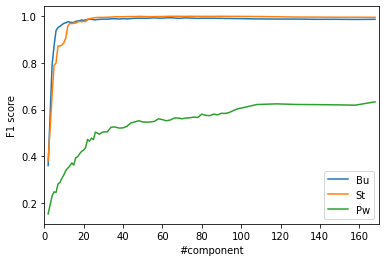

In [5]:
p1 = pcad.loc[0][['st_f1','bu_f1','pw_f1']]
plt.plot(p1)
plt.xlabel('#component')
plt.ylabel('F1 score')
plt.legend(['Bu', 'St','Pw'], loc='best')
plt.xlim([0, 170])

(0.0, 170.0)

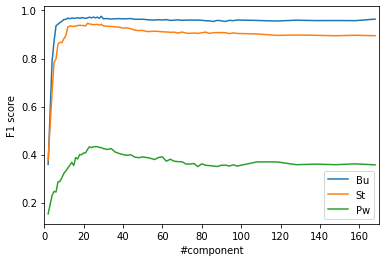

In [211]:
p1 = pcad.loc[1][['st_f1','bu_f1','pw_f1']]
plt.plot(p1)
plt.xlabel('#component')
plt.ylabel('F1 score')
plt.legend(['Bu', 'St','Pw'], loc='best')
plt.xlim([0, 170])

(0.0, 170.0)

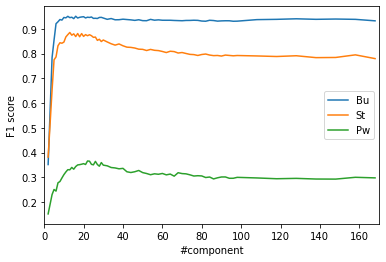

In [212]:
p1 = pcad.loc[2][['st_f1','bu_f1','pw_f1']]
plt.plot(p1)
plt.xlabel('#component')
plt.ylabel('F1 score')
plt.legend(['Bu', 'St','Pw'], loc='best')
plt.xlim([0, 170])

(0.0, 170.0)

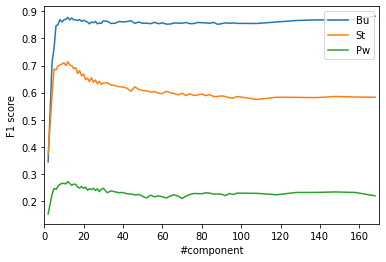

In [213]:
p1 = pcad.loc[5][['st_f1','bu_f1','pw_f1']]
plt.plot(p1)
plt.xlabel('#component')
plt.ylabel('F1 score')
plt.legend(['Bu', 'St','Pw'], loc='best')
plt.xlim([0, 170])

### ade vs de preformance

In [28]:
ade  = joblib.load('result/ppnit10_0517.pkl')
de   = joblib.load('result/nit10_0517.pkl')

In [233]:
ade.keys()

dict_keys(['sigmas', 'num', 'noise', 'record', 'de_results', 'de_iteration', 'cases'])

TypeError: legend only accepts two non-keyword arguments

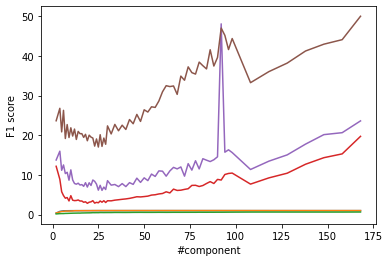

In [201]:
p1 = pcad.loc[0][['st_f1','bu_f1','pw_f1']]
plt.plot(p1)
plt.xlabel('#component')
plt.ylabel('F1 score')
plt.legend('Bu', 'St','Pw', loc='right')

In [234]:
ade_error = ade['de_results'][['field_error', 'linf_error', 'de_time']].groupby(level=0).mean()

In [235]:
de_error = de['de_results'][['field_error', 'linf_error', 'de_time']].groupby(level=0).mean()

In [339]:
de_ade_error = ade_error.merge(right = de_error, on ='sigma' )
de_ade_error

,field_error_x,linf_error_x,de_time_x,field_error_y,linf_error_y,de_time_y
sigma,,,,,,
0,0.007923,0.053850,0.827058,0.012978,0.071228,0.959224
1,0.008393,0.055391,0.698771,0.012828,0.073385,1.289352
2,0.008472,0.055204,0.654410,0.012834,0.064769,1.065809
3,0.009225,0.059062,0.645574,0.013971,0.071001,0.893681
4,0.010588,0.061934,0.643619,0.014537,0.076342,1.092029
5,0.012234,0.067747,0.622435,0.014224,0.070482,1.057303


In [342]:
ade['de_results']

field_error  observation_error  linf_error  f_field_error  \
sigma id                                                                
0     7270     0.008658           0.005515    0.064436       0.008603   
      860      0.007755           0.005137    0.047893       0.013166   
      5390     0.009970           0.006314    0.043341       0.009970   
      5191     0.005999           0.002760    0.036012       0.005999   
      5734     0.009596           0.006413    0.090512       0.013642   
...                 ...                ...         ...            ...   
5     6736     0.013665           0.053608    0.054810       0.011670   
      391      0.008414           0.050028    0.092874       0.010554   
      5892     0.010312           0.051010    0.059817       0.008661   
      3561     0.008226           0.046364    0.035344       0.012652   
      6184     0.010116           0.046975    0.086936       0.006683   

            f_observation_error  f_linf_error  p_field_error  \
sigma id                                                       
0     7270             0.005651      0.054674       0.068017   
      860              0.011281      0.068053       0.030406   
      5390             0.006314      0.043341       0.045080   
      5191             0.002760      0.036012       0.018834   
      5734             0.012149      0.053534       0.023763   
...                         ...           ...            ...   
5     6736             0.054655      0.038123       0.071235   
      391              0.051000      0.085255       0.070532   
      5892             0.052573      0.072313       0.026796   
      3561             0.047223      0.041713       0.035041   
      6184             0.047749      0.052667       0.070576   

            p_observation_error  p_linf_error   nfev   nit   de_time  \
sigma id                                                               
0     7270             0.062578      0.266336  660.0  10.0  0.852720   
      860              0.028147      0.111394  660.0  10.0  0.837759   
      5390             0.042807      0.140337  660.0  10.0  0.832773   
      5191             0.017532      0.079267  660.0  10.0  0.826788   
      5734             0.017896      0.201574  660.0  10.0  0.825791   
...                         ...           ...    ...   ...       ...   
5     6736             0.079137      0.271303  660.0  10.0  0.642282   
      391              0.084412      0.171932  660.0  10.0  0.673199   
      5892             0.056653      0.207377  660.0  10.0  0.671205   
      3561             0.056971      0.076486  660.0  10.0  0.655248   
      6184             0.085759      0.175495  660.0  10.0  0.649266   

                    st          bu         pw         tin     x0st   x0bu  \
sigma id                                                                    
0     7270  576.810961  152.750273  63.666491  290.792772  568.875  150.0   
      860   286.235513   15.351583  73.227969  299.720434  292.125    0.0   
      5390  562.715039  106.590420  38.978289  290.075734  568.875  100.0   
      5191  500.686411  100.914367  52.224169  299.393798  507.375  100.0   
      5734   67.359024  109.294646  69.967301  298.989527   76.875  150.0   
...                ...         ...        ...         ...      ...    ...   
5     6736  393.421016   80.461434  90.092088  290.275037  384.375    0.0   
      391   130.652524   14.057081  49.249533  295.394727  138.375    0.0   
      5892  116.463227  125.086229  37.778609  291.817333  107.625  150.0   
      3561  569.899890   54.966731  56.345991  290.527329  568.875   50.0   
      6184  218.121090  166.990901  53.338191  292.360604  199.875  150.0   

            x0pw  x0tin    st0    bu0      pw0     tin0  
sigma id                                                 
0     7270  56.0  295.0  575.0  150.0  59.7192  293.180  
      860   88.0  295.0  286.0    0.0  67.7051  299.817  
      5390  40.0  295.0  564.0  100.0  41.7798  290.783  


In [340]:
de_ade_error.style.to_latex('result\de_ade_error.tex')

In [238]:
e_nit10 = de['de_iteration']
e_ppnit10 = ade['de_iteration']

In [240]:
e_ppnit10.keys()

dict_keys([(0, 7270, 'x'), (0, 7270, 'c'), (0, 7270, 'e'), (0, 860, 'x'), (0, 860, 'c'), (0, 860, 'e'), (0, 5390, 'x'), (0, 5390, 'c'), (0, 5390, 'e'), (0, 5191, 'x'), (0, 5191, 'c'), (0, 5191, 'e'), (0, 5734, 'x'), (0, 5734, 'c'), (0, 5734, 'e'), (0, 6265, 'x'), (0, 6265, 'c'), (0, 6265, 'e'), (0, 466, 'x'), (0, 466, 'c'), (0, 466, 'e'), (0, 4426, 'x'), (0, 4426, 'c'), (0, 4426, 'e'), (0, 5578, 'x'), (0, 5578, 'c'), (0, 5578, 'e'), (0, 8322, 'x'), (0, 8322, 'c'), (0, 8322, 'e'), (0, 1685, 'x'), (0, 1685, 'c'), (0, 1685, 'e'), (0, 769, 'x'), (0, 769, 'c'), (0, 769, 'e'), (0, 6949, 'x'), (0, 6949, 'c'), (0, 6949, 'e'), (0, 2433, 'x'), (0, 2433, 'c'), (0, 2433, 'e'), (0, 5311, 'x'), (0, 5311, 'c'), (0, 5311, 'e'), (0, 5051, 'x'), (0, 5051, 'c'), (0, 5051, 'e'), (0, 6420, 'x'), (0, 6420, 'c'), (0, 6420, 'e'), (0, 1184, 'x'), (0, 1184, 'c'), (0, 1184, 'e'), (0, 4555, 'x'), (0, 4555, 'c'), (0, 4555, 'e'), (0, 3385, 'x'), (0, 3385, 'c'), (0, 3385, 'e'), (0, 6396, 'x'), (0, 6396, 'c'), (0, 63

In [290]:
def online_error(deiter):
    es = np.zeros((6,10,3))
    for s, i, c in deiter.keys():
        if c == 'e':
            it = deiter[(s,i,c)].shape[0]
            if it == 10:
                es[s,:,:] =  es[s,:,:] + deiter[(s,i,c)]/100
            else:
               # print((s,i,c,it))
                d = np.zeros((10,3));
                d[0:it,:] = deiter[(s,i,c)]
                d[it:,:] = deiter[(s,i,c)][it-1,:]
                es[s,:,:] = es[s,:,:] + d/100
               # print(d)
    return es


In [291]:
es = online_error(e_nit10)

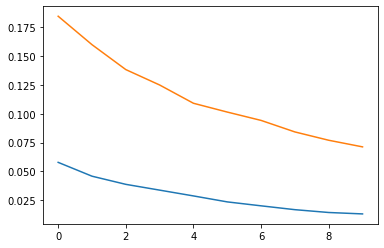

In [292]:
plt.plot(es[0,:,1:3])

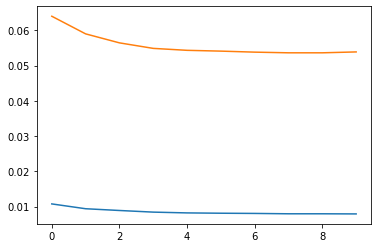

In [293]:
pes = online_error(e_ppnit10)
plt.plot(pes[0,:,1:3])

Text(0, 0.5, 'error')

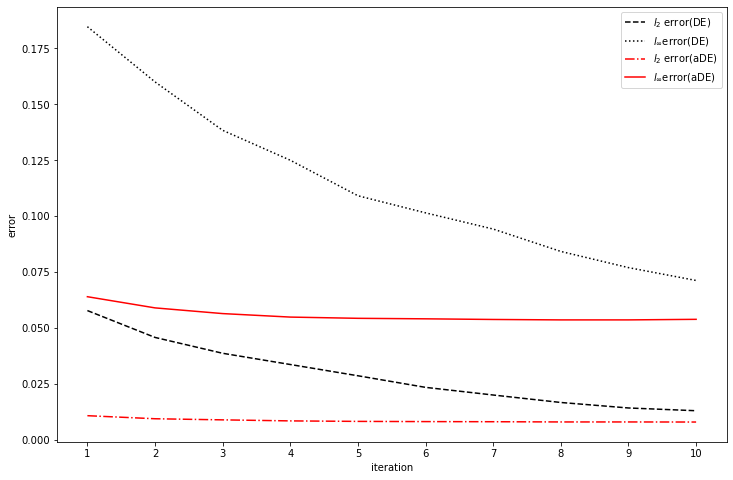

In [331]:
plt.figure(figsize=(12, 8))
plt.plot(es[0,:,1],'k--')
plt.plot(es[0,:,2],'k:')
plt.plot(pes[0,:,1],'r-.')
plt.plot(pes[0,:,2],'r-')
plt.legend([r'$l_2$'+' error(DE)',r'$l_\infty$'+'error(DE)',r'$l_2$'+' error(aDE)',r'$l_\infty$'+'error(aDE)'])
plt.xticks(list(range(0,10)),list(range(1,11)))
plt.xlabel('iteration')
plt.ylabel('error')

In [67]:
ade  = joblib.load('result/ppnit10_0517.pkl')
de   = joblib.load('result/nit10_0517.pkl')

In [68]:
ade.keys()

dict_keys(['sigmas', 'num', 'noise', 'record', 'de_results', 'de_iteration', 'cases'])

In [69]:
pd.set_option('display.max_columns', 100)
eade = ade['de_results']
ede = de['de_results']


In [70]:
pd.set_option('display.max_rows', 100)

In [71]:
eade

field_error  observation_error  linf_error  f_field_error  \
sigma id                                                                
0     7270     0.008658           0.005515    0.064436       0.008603   
      860      0.007755           0.005137    0.047893       0.013166   
      5390     0.009970           0.006314    0.043341       0.009970   
      5191     0.005999           0.002760    0.036012       0.005999   
      5734     0.009596           0.006413    0.090512       0.013642   
...                 ...                ...         ...            ...   
5     6736     0.013665           0.053608    0.054810       0.011670   
      391      0.008414           0.050028    0.092874       0.010554   
      5892     0.010312           0.051010    0.059817       0.008661   
      3561     0.008226           0.046364    0.035344       0.012652   
      6184     0.010116           0.046975    0.086936       0.006683   

            f_observation_error  f_linf_error  p_field_error  \
sigma id                                                       
0     7270             0.005651      0.054674       0.068017   
      860              0.011281      0.068053       0.030406   
      5390             0.006314      0.043341       0.045080   
      5191             0.002760      0.036012       0.018834   
      5734             0.012149      0.053534       0.023763   
...                         ...           ...            ...   
5     6736             0.054655      0.038123       0.071235   
      391              0.051000      0.085255       0.070532   
      5892             0.052573      0.072313       0.026796   
      3561             0.047223      0.041713       0.035041   
      6184             0.047749      0.052667       0.070576   

            p_observation_error  p_linf_error   nfev   nit   de_time  \
sigma id                                                               
0     7270             0.062578      0.266336  660.0  10.0  0.852720   
      860              0.028147      0.111394  660.0  10.0  0.837759   
      5390             0.042807      0.140337  660.0  10.0  0.832773   
      5191             0.017532      0.079267  660.0  10.0  0.826788   
      5734             0.017896      0.201574  660.0  10.0  0.825791   
...                         ...           ...    ...   ...       ...   
5     6736             0.079137      0.271303  660.0  10.0  0.642282   
      391              0.084412      0.171932  660.0  10.0  0.673199   
      5892             0.056653      0.207377  660.0  10.0  0.671205   
      3561             0.056971      0.076486  660.0  10.0  0.655248   
      6184             0.085759      0.175495  660.0  10.0  0.649266   

                    st          bu         pw         tin     x0st   x0bu  \
sigma id                                                                    
0     7270  576.810961  152.750273  63.666491  290.792772  568.875  150.0   
      860   286.235513   15.351583  73.227969  299.720434  292.125    0.0   
      5390  562.715039  106.590420  38.978289  290.075734  568.875  100.0   
      5191  500.686411  100.914367  52.224169  299.393798  507.375  100.0   
      5734   67.359024  109.294646  69.967301  298.989527   76.875  150.0   
...                ...         ...        ...         ...      ...    ...   
5     6736  393.421016   80.461434  90.092088  290.275037  384.375    0.0   
      391   130.652524   14.057081  49.249533  295.394727  138.375    0.0   
      5892  116.463227  125.086229  37.778609  291.817333  107.625  150.0   
      3561  569.899890   54.966731  56.345991  290.527329  568.875   50.0   
      6184  218.121090  166.990901  53.338191  292.360604  199.875  150.0   

            x0pw  x0tin    st0    bu0      pw0     tin0  
sigma id                                                 
0     7270  56.0  295.0  575.0  150.0  59.7192  293.180  
      860   88.0  295.0  286.0    0.0  67.7051  299.817  
      5390  40.0  295.0  564.0  100.0  41.7798  290.783  


In [72]:
ede

field_error  observation_error  linf_error  f_field_error  \
sigma id                                                                
0     7270     0.015969           0.013181    0.107012       0.008603   
      860      0.009892           0.007802    0.045849       0.013166   
      5390     0.009970           0.006314    0.043341       0.009970   
      5191     0.014562           0.011728    0.056400       0.005999   
      5734     0.013312           0.011653    0.065941       0.013642   
...                 ...                ...         ...            ...   
5     6736     0.009281           0.053644    0.040807       0.011670   
      391      0.020491           0.052547    0.086107       0.010554   
      5892     0.009195           0.051513    0.076006       0.008661   
      3561     0.008226           0.046364    0.035344       0.012652   
      6184     0.023987           0.048486    0.164852       0.006683   

            f_observation_error  f_linf_error   nfev   nit   de_time  \
sigma id                                                               
0     7270             0.005651      0.054674  660.0  10.0  1.006308   
      860              0.011281      0.068053  660.0  10.0  1.190815   
      5390             0.006314      0.043341  660.0  10.0  1.314485   
      5191             0.002760      0.036012  660.0  10.0  1.265615   
      5734             0.012149      0.053534  660.0  10.0  1.220735   
...                         ...           ...    ...   ...       ...   
5     6736             0.054655      0.038123  660.0  10.0  0.770939   
      391              0.051000      0.085255  660.0  10.0  0.800857   
      5892             0.052573      0.072313  660.0  10.0  0.778917   
      3561             0.047223      0.041713  660.0  10.0  0.788890   
      6184             0.047749      0.052667  660.0  10.0  0.767946   

                    st         bu          pw         tin    st0      bu0  \
sigma id                                                                    
0     7270  296.008823  52.957183  570.908410  297.945855  150.0  59.7192   
      860     0.916830  74.716365  285.503642  295.953578    0.0  67.7051   
      5390   78.785821  39.132245  561.785438  293.257696  100.0  41.7798   
      5191  116.832664  50.238676  496.737802  297.231946  100.0  51.4551   
      5734  138.180505  82.294455   58.988343  291.321865  150.0  79.4653   
...                ...        ...         ...         ...    ...      ...   
5     6736  133.515439  94.706938  394.743479  292.605436  150.0  93.1665   
      391    29.809265  78.397689  124.071506  292.412847    0.0  51.9043   
      5892  113.631251  33.480570  114.720116  298.279231  150.0  30.8594   
      3561   52.154124  56.613774  570.416508  291.585234   50.0  55.5298   
      6184  128.282739  45.672910  222.105270  294.316021  150.0  53.5864   

              pw0     tin0  
sigma id                    
0     7270  575.0  293.180  
      860   286.0  299.817  
      5390  564.0  290.783  
      5191  498.0  294.480  
      5734   63.0  291.095  
...           ...      ...  
5     6736  397.0  291.563  
      391   130.0  296.290  
      5892  116.0  291.628  
      3561  571.0  294.836  
      6184  213.0  292.745  

[600 rows x 17 columns]

In [73]:
def getd_de(de_c5):
    de_c5['d_bu'] = pd.DataFrame.abs(de_c5['st'] -  de_c5['st0'])
    de_c5['d_st'] = pd.DataFrame.abs(de_c5['pw'] -  de_c5['pw0'])
    de_c5['d_pw'] = pd.DataFrame.abs(de_c5['bu'] -  de_c5['bu0'])
    de_c5['d_tin'] = pd.DataFrame.abs(de_c5['tin'] -  de_c5['tin0'])

In [74]:
def getd_ade(de_c5):
    de_c5['d_bu'] = pd.DataFrame.abs(de_c5['bu'] -  de_c5['bu0'])
    de_c5['d_st'] = pd.DataFrame.abs(de_c5['st'] -  de_c5['st0'])
    de_c5['d_pw'] = pd.DataFrame.abs(de_c5['pw'] -  de_c5['pw0'])
    de_c5['d_tin'] = pd.DataFrame.abs(de_c5['tin'] -  de_c5['tin0'])
    de_c5['d_bu0'] = (de_c5['bu'] -  de_c5['bu0'])
    de_c5['d_st0'] = (de_c5['st'] -  de_c5['st0'])
    de_c5['d_pw0'] = (de_c5['pw'] -  de_c5['pw0'])
    de_c5['d_tin0'] =(de_c5['tin'] -  de_c5['tin0'])
    de_c5['dp_bu'] = pd.DataFrame.abs(de_c5['bu0'] -  de_c5['x0bu'])
    de_c5['dp_st'] = pd.DataFrame.abs(de_c5['st0'] -  de_c5['x0st'])
    de_c5['dp_pw'] = pd.DataFrame.abs(de_c5['pw0'] -  de_c5['x0pw'])
    de_c5['dp_tin'] = pd.DataFrame.abs(de_c5['tin0'] -  de_c5['x0tin'])

In [75]:
getd_de(ede)

In [76]:
getd_ade(eade)

In [77]:
ade_error = ade['de_results'][['field_error', 'linf_error','d_bu','d_st','d_pw','d_tin', 'de_time']].groupby(level=0).mean()
de_error = de['de_results'][['field_error', 'linf_error','d_bu','d_st','d_pw','d_tin' ,'de_time']].groupby(level=0).mean()

In [78]:
de_ade_error = ade_error.merge(right = de_error, on ='sigma' )
de_ade_error

,field_error_x,linf_error_x,d_bu_x,d_st_x,d_pw_x,d_tin_x,de_time_x,field_error_y,linf_error_y,d_bu_y,d_st_y,d_pw_y,d_tin_y,de_time_y
sigma,,,,,,,,,,,,,,
0,0.007923,0.053850,27.818477,1.792890,2.772621,2.289186,0.827058,0.012978,0.071228,64.884813,3.246740,4.949868,2.871498,0.959224
1,0.008393,0.055391,26.138929,1.844643,2.989004,2.207754,0.698771,0.012828,0.073385,43.065001,3.157633,4.303936,2.622432,1.289352
2,0.008472,0.055204,31.459386,2.223685,2.783420,2.420855,0.654410,0.012834,0.064769,46.929677,2.717139,4.789400,2.537049,1.065809
3,0.009225,0.059062,31.313723,1.937088,3.250101,2.683827,0.645574,0.013971,0.071001,72.212804,3.200319,5.181058,2.911776,0.893681
4,0.010588,0.061934,36.499354,2.483231,4.184257,2.314488,0.643619,0.014537,0.076342,60.706173,3.681615,5.275357,2.357222,1.092029
5,0.012234,0.067747,65.376615,3.176924,3.739924,2.721513,0.622435,0.014224,0.070482,72.924809,3.016967,4.831316,2.421883,1.057303


In [85]:
de_ade_error[['field_error_x','linf_error_x', 'field_error_y', 'linf_error_y']] =de_ade_error[['field_error_x','linf_error_x', 'field_error_y', 'linf_error_y']] * 100
de_ade_error

,field_error_x,linf_error_x,d_bu_x,d_st_x,d_pw_x,d_tin_x,de_time_x,field_error_y,linf_error_y,d_bu_y,d_st_y,d_pw_y,d_tin_y,de_time_y
sigma,,,,,,,,,,,,,,
0,0.792330,5.385033,27.818477,1.792890,2.772621,2.289186,0.827058,1.297755,7.122754,64.884813,3.246740,4.949868,2.871498,0.959224
1,0.839265,5.539145,26.138929,1.844643,2.989004,2.207754,0.698771,1.282813,7.338512,43.065001,3.157633,4.303936,2.622432,1.289352
2,0.847184,5.520450,31.459386,2.223685,2.783420,2.420855,0.654410,1.283372,6.476873,46.929677,2.717139,4.789400,2.537049,1.065809
3,0.922532,5.906159,31.313723,1.937088,3.250101,2.683827,0.645574,1.397147,7.100131,72.212804,3.200319,5.181058,2.911776,0.893681
4,1.058824,6.193427,36.499354,2.483231,4.184257,2.314488,0.643619,1.453677,7.634202,60.706173,3.681615,5.275357,2.357222,1.092029
5,1.223435,6.774686,65.376615,3.176924,3.739924,2.721513,0.622435,1.422427,7.048179,72.924809,3.016967,4.831316,2.421883,1.057303


In [93]:
de_ade_error.to_latex('result/deade.tex',float_format= r'{:.2f}'.format)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2996\1984997143.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  de_ade_error.to_latex('result/deade.tex',float_format= r'{:.2f}'.format)


In [79]:
perror = eade[['dp_bu','dp_st','dp_pw','dp_tin']].groupby(level=0).mean()
perror

,dp_bu,dp_st,dp_pw,dp_tin
sigma,,,,
0,0.5,7.165,4.947498,2.55564
1,2.5,7.290,5.821074,2.55564
2,12.5,7.190,7.499950,2.55564
3,21.0,7.305,7.265980,2.55564
4,35.5,7.640,8.726796,2.55564
5,64.0,7.810,8.625018,2.55564


In [92]:
perror.to_latex('result/perror.tex',float_format= r'{:.2f}'.format)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2996\3425570766.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  perror.to_latex('result/perror.tex',float_format= r'{:.2f}'.format)


In [80]:
diffn = eade[['d_bu0', 'd_st0', 'd_pw0', 'd_tin0']].rename(columns={'d_bu0':'Bu', 'd_st0':'St', 'd_pw0':'Pw', 'd_tin0':'Tin'}) 

f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

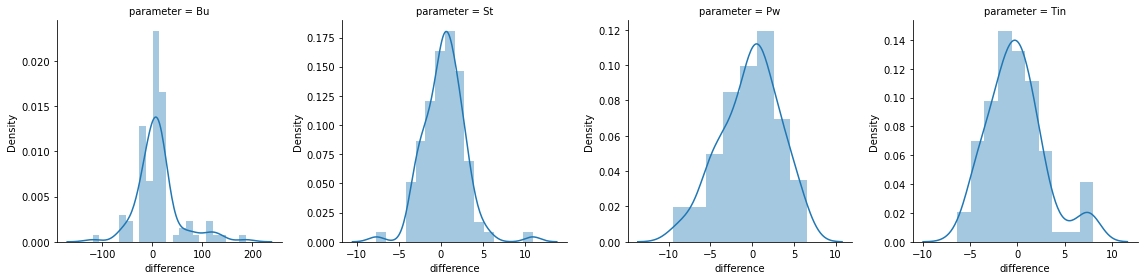

In [81]:
g = sns.FacetGrid(diffn.loc[0].melt(var_name='parameter', value_name='difference'), 
                  col="parameter", sharex=False, sharey=False,
                 col_wrap=4, height=4)
g.map(sns.distplot, "difference")

f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

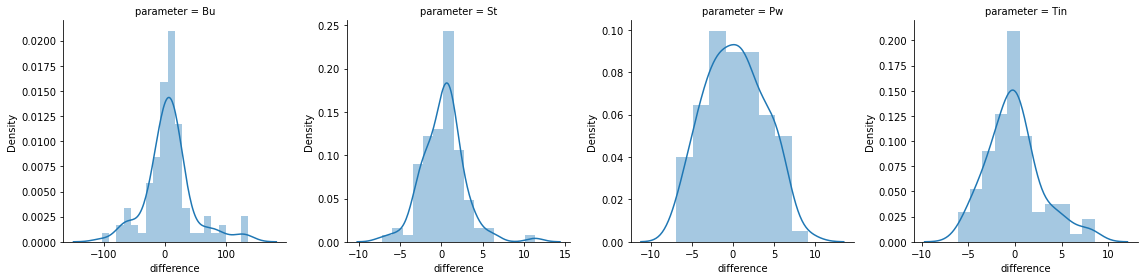

In [82]:
g = sns.FacetGrid(diffn.loc[1].melt(var_name='parameter', value_name='difference'), 
                  col="parameter", sharex=False, sharey=False,
                 col_wrap=4, height=4)
g.map(sns.distplot, "difference")

f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

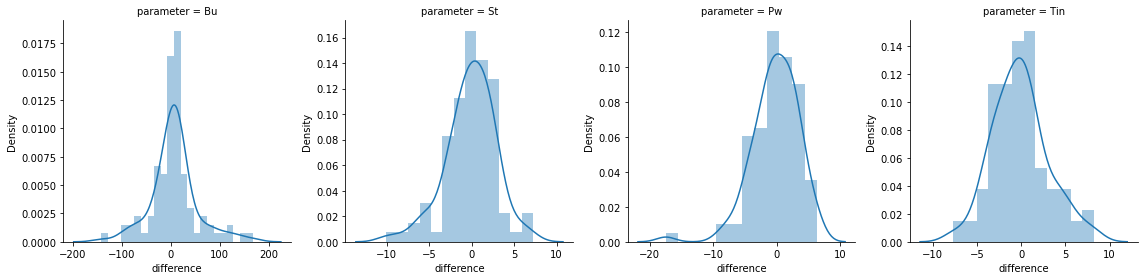

In [83]:
g = sns.FacetGrid(diffn.loc[2].melt(var_name='parameter', value_name='difference'), 
                  col="parameter", sharex=False, sharey=False,
                 col_wrap=4, height=4)
g.map(sns.distplot, "difference")

f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
f:\ProgramData\Anaconda3\envs\nuclear\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

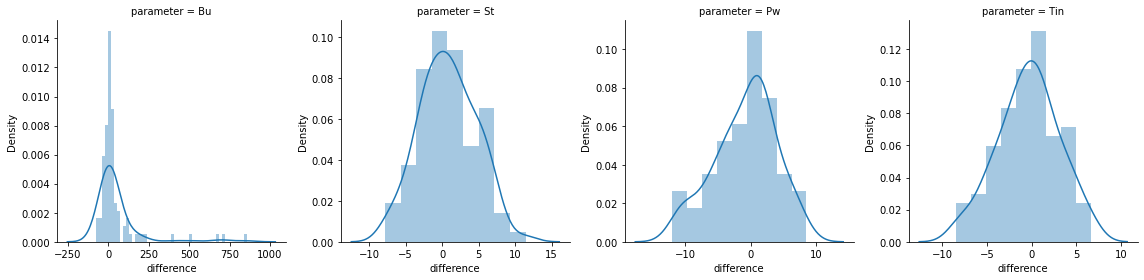

In [84]:
g = sns.FacetGrid(diffn.loc[5].melt(var_name='parameter', value_name='difference'), 
                  col="parameter", sharex=False, sharey=False,
                 col_wrap=4, height=4)
g.map(sns.distplot, "difference")

# 混淆矩阵